### Loading the Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats 
warnings.filterwarnings('ignore')

/var/folders/5q/fz2ywvjs02ldr5cws68xhsph0000gp/T/ipykernel_1009/2986126171.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading the Dataset

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Lets get to know more about the dataset

In [5]:
print(f"number of rows: {df.shape[0]:,}\nnumber of columns: {df.shape[1]:,}")

number of rows: 550,068
number of columns: 10


Lets check for null values 

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Lets check for unique values 

In [7]:
df.nunique().sort_values(ascending= False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

checking for duplicates 

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


changing the type from object to category

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [11]:
cols = ['User_ID','Product_ID', 'Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status']

df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 17.6 MB


In [12]:
df.describe(include=['object', 'category']).T


,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


From the above tabel we see that.                  

frequently bought product : P00265242

Gender who shops more: male

age range of frequent shopper: 26-35

city_category: B type 

unmarried people shop more

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [14]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

Doing the univariate analysis of the data

<Axes: xlabel='City_Category', ylabel='count'>

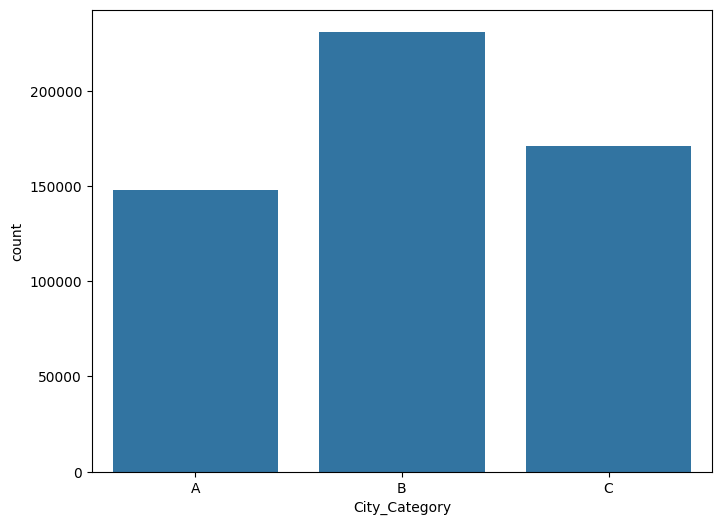

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['City_Category'])

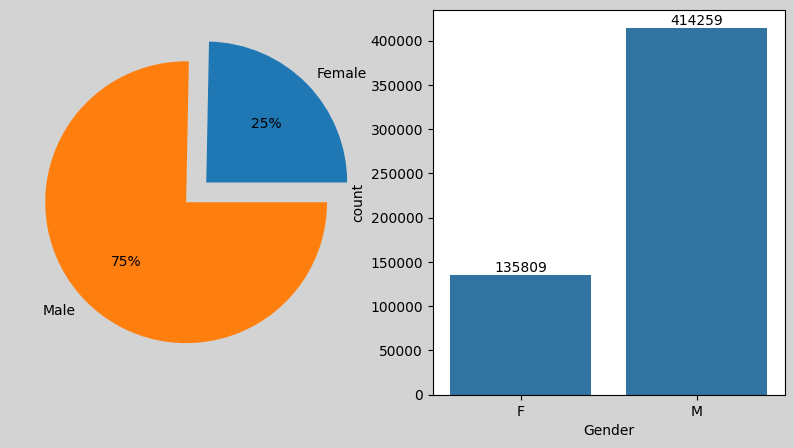

In [21]:
plt.figure(figsize= (10,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
label = ["Female", "Male"]
plt.pie(df.groupby('Gender')['Gender'].count(), labels= label, explode= (0.20,0), autopct= '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data= df, x = 'Gender')

for i in label.containers:
    label.bar_label(i)

plt.show()

In [28]:

def univariate (D, x_list: list):
    for items in x_list:

        plt.figure(figsize= (10,5)).set_facecolor("lightgrey")

        #plt.subplot(1,2,1)
        #label = D['items'].unique().tolist()
        #plt.pie(df.groupby('items')['items'].count(), labels= label, explode= (0.20,0), autopct= '%0.0f%%')

        #plt.subplot(1,2,2)
        ns.countplot(data= df, x = 'items')

        #for i in label.containers:
            #label.bar_label(i)

        plt.show()

In [27]:
univariate(df, x_list= ['User_ID','Product_ID', 'Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status'])

ValueError: Could not interpret value `items` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>